In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from helpers import *
from scipy import ndimage

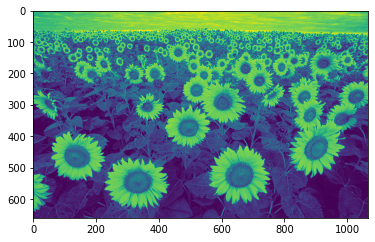

In [49]:
im = cv2.imread("data/sunflowers.jpg").astype(np.float32)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im)

In [50]:
def scaleSpaced(im, sigma, n):
    image = im.copy()
    sigma = 3
    gss = []
    for i in range(n):
        g,gx = gaussian1DKernel(sigma*(2**i))
        image = cv2.filter2D(image, -1, g)
        image = cv2.filter2D(image, -1, g.T)
        gss.append(image)
    return gss

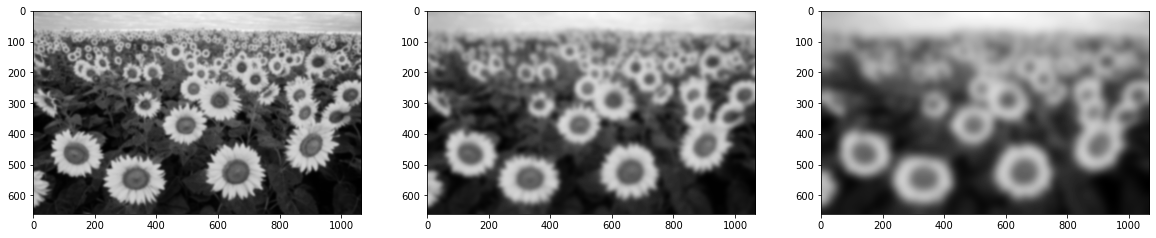

In [51]:
n = 3
sigma = 3
image = im.copy()
fig, axs = plt.subplots(1,n,figsize=(20, 8))
gss = []
for i in range(n):
    g,gx = gaussian1DKernel(sigma*(2**i))
    image = cv2.filter2D(image, -1, g)
    image = cv2.filter2D(image, -1, g.T)
    axs[i].imshow(image,cmap='gray')
    gss.append(image)

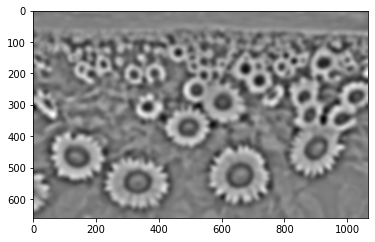

In [52]:
im_scales = scaleSpaced(im, sigma, n)
plt.imshow(im_scales[1] - im_scales[2], cmap='gray') # DoG

In [53]:
def differenceOfGaussian(im, sigma, n):
    dogs = []
    ss = scaleSpaced(im, sigma, n)
    for i in range(1,len(ss)):
        dogs.append(ss[i] - ss[i-1])
    return dogs

In [60]:
def detectBlobs(im, sigma, n, threshold):
    DoGs = differenceOfGaussian(im, sigma, n)
    final = abs(DoGs[0]).copy()
    for i,d in enumerate(DoGs):
        final = np.maximum(final, abs(d))
    final[final < threshold] = 0
    final[~(final < threshold)] = 1
    return final

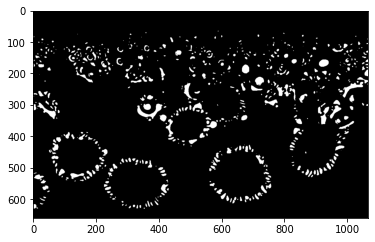

In [61]:
threshold = 30
blobs = detectBlobs(im, sigma, n, threshold)
plt.imshow(blobs, cmap='gray')

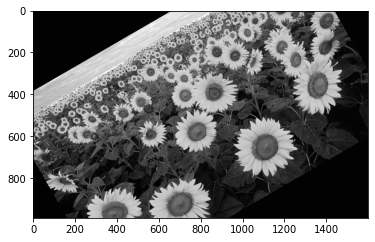

In [92]:
s = 1.5
theta = 30
im_r = cv2.resize(im, None, fx=s, fy=s)
im_r = ndimage.rotate(im_r, theta, reshape=False)
plt.imshow(im_r, cmap='gray')

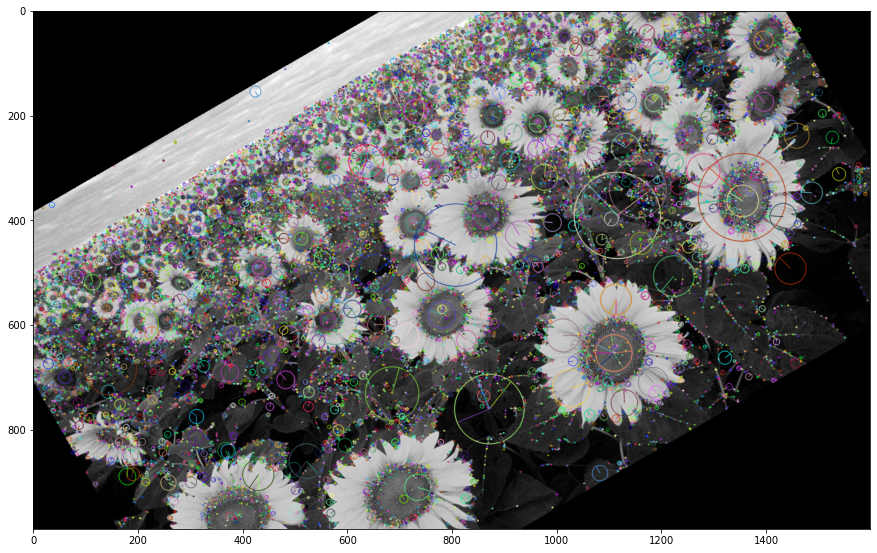

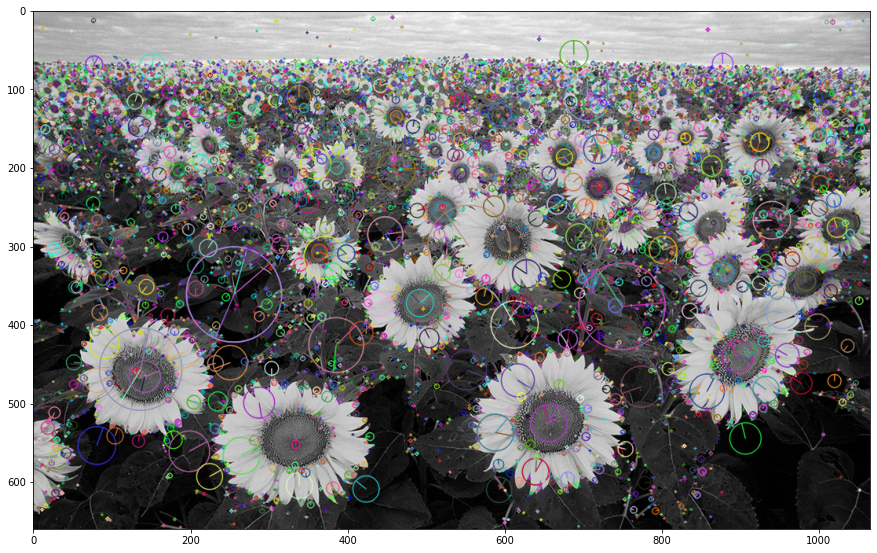

In [96]:
sift = cv2.SIFT_create()
im_r = im_r.astype(np.uint8)
im = im.astype(np.uint8)
kp,des = sift.detectAndCompute(im_r, None)
kp1,des1 = sift.detectAndCompute(im, None)
img=cv2.drawKeypoints(im_r,kp,im_r,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img1=cv2.drawKeypoints(im,kp1,im,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(1, figsize=(15,15))
plt.imshow(img)
plt.figure(2, figsize=(15,15))
plt.imshow(img1)

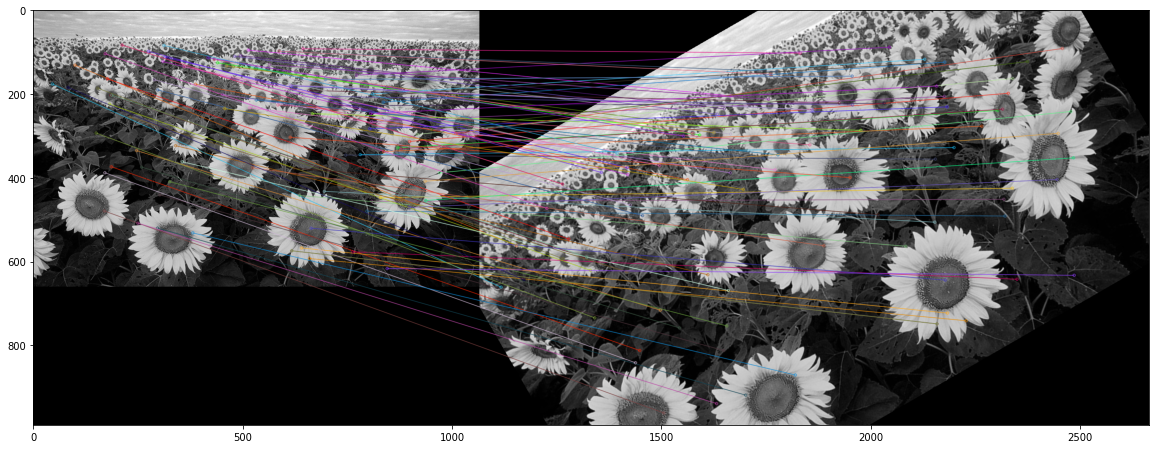

In [100]:
bf = cv2.BFMatcher()
matches = bf.match(des1,des)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(im,kp1,im_r,kp,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,20))
plt.imshow(img3)